In [4]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("decisionTree_Data.csv")

X= df.iloc[:,[0,1]].values
y= df.iloc[:,2].values

In [6]:
%pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


    ERROR: Command errored out with exit status 1:
     command: 'c:\ProgramData\Anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\mpstme.student\\AppData\\Local\\Temp\\pip-install-3shxaga7\\sklearn_c9d1f373a43d4e5f9a157be5c7084109\\setup.py'"'"'; __file__='"'"'C:\\Users\\mpstme.student\\AppData\\Local\\Temp\\pip-install-3shxaga7\\sklearn_c9d1f373a43d4e5f9a157be5c7084109\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\mpstme.student\AppData\Local\Temp\pip-pip-egg-info-wcmbjbj2'
         cwd: C:\Users\mpstme.student\AppData\Local\Temp\pip-install-3shxaga7\sklearn_c9d1f373a43d4e5f9a157be5c7084109\
    Complete output (15 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-lea


  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=caf14edc5998e414563090e67b42740a7a97ddb53516ac61c21e36a9066f97c8
  Stored in directory: c:\users\mpstme.student\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


    
    More information is available at
    https://github.com/scikit-learn/sklearn-pypi-package
    
    If the previous advice does not cover your use case, feel free to report it at
    https://github.com/scikit-learn/sklearn-pypi-package/issues/new
    ----------------------------------------
    ERROR: Command errored out with exit status 1:
     command: 'c:\ProgramData\Anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\mpstme.student\\AppData\\Local\\Temp\\pip-install-3shxaga7\\sklearn_3dabfc61bcc242b68ec0a849db98dc8a\\setup.py'"'"'; __file__='"'"'C:\\Users\\mpstme.student\\AppData\\Local\\Temp\\pip-install-3shxaga7\\sklearn_3dabfc61bcc242b68ec0a849db98dc8a\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size= 0.25,random_state=0)



In [10]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
#
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier

classifer  = DecisionTreeClassifier(criterion="entropy",random_state=0)
classifer.fit(X_train,y_train)




DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
y_pred= classifer.predict(X_test)




In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.9

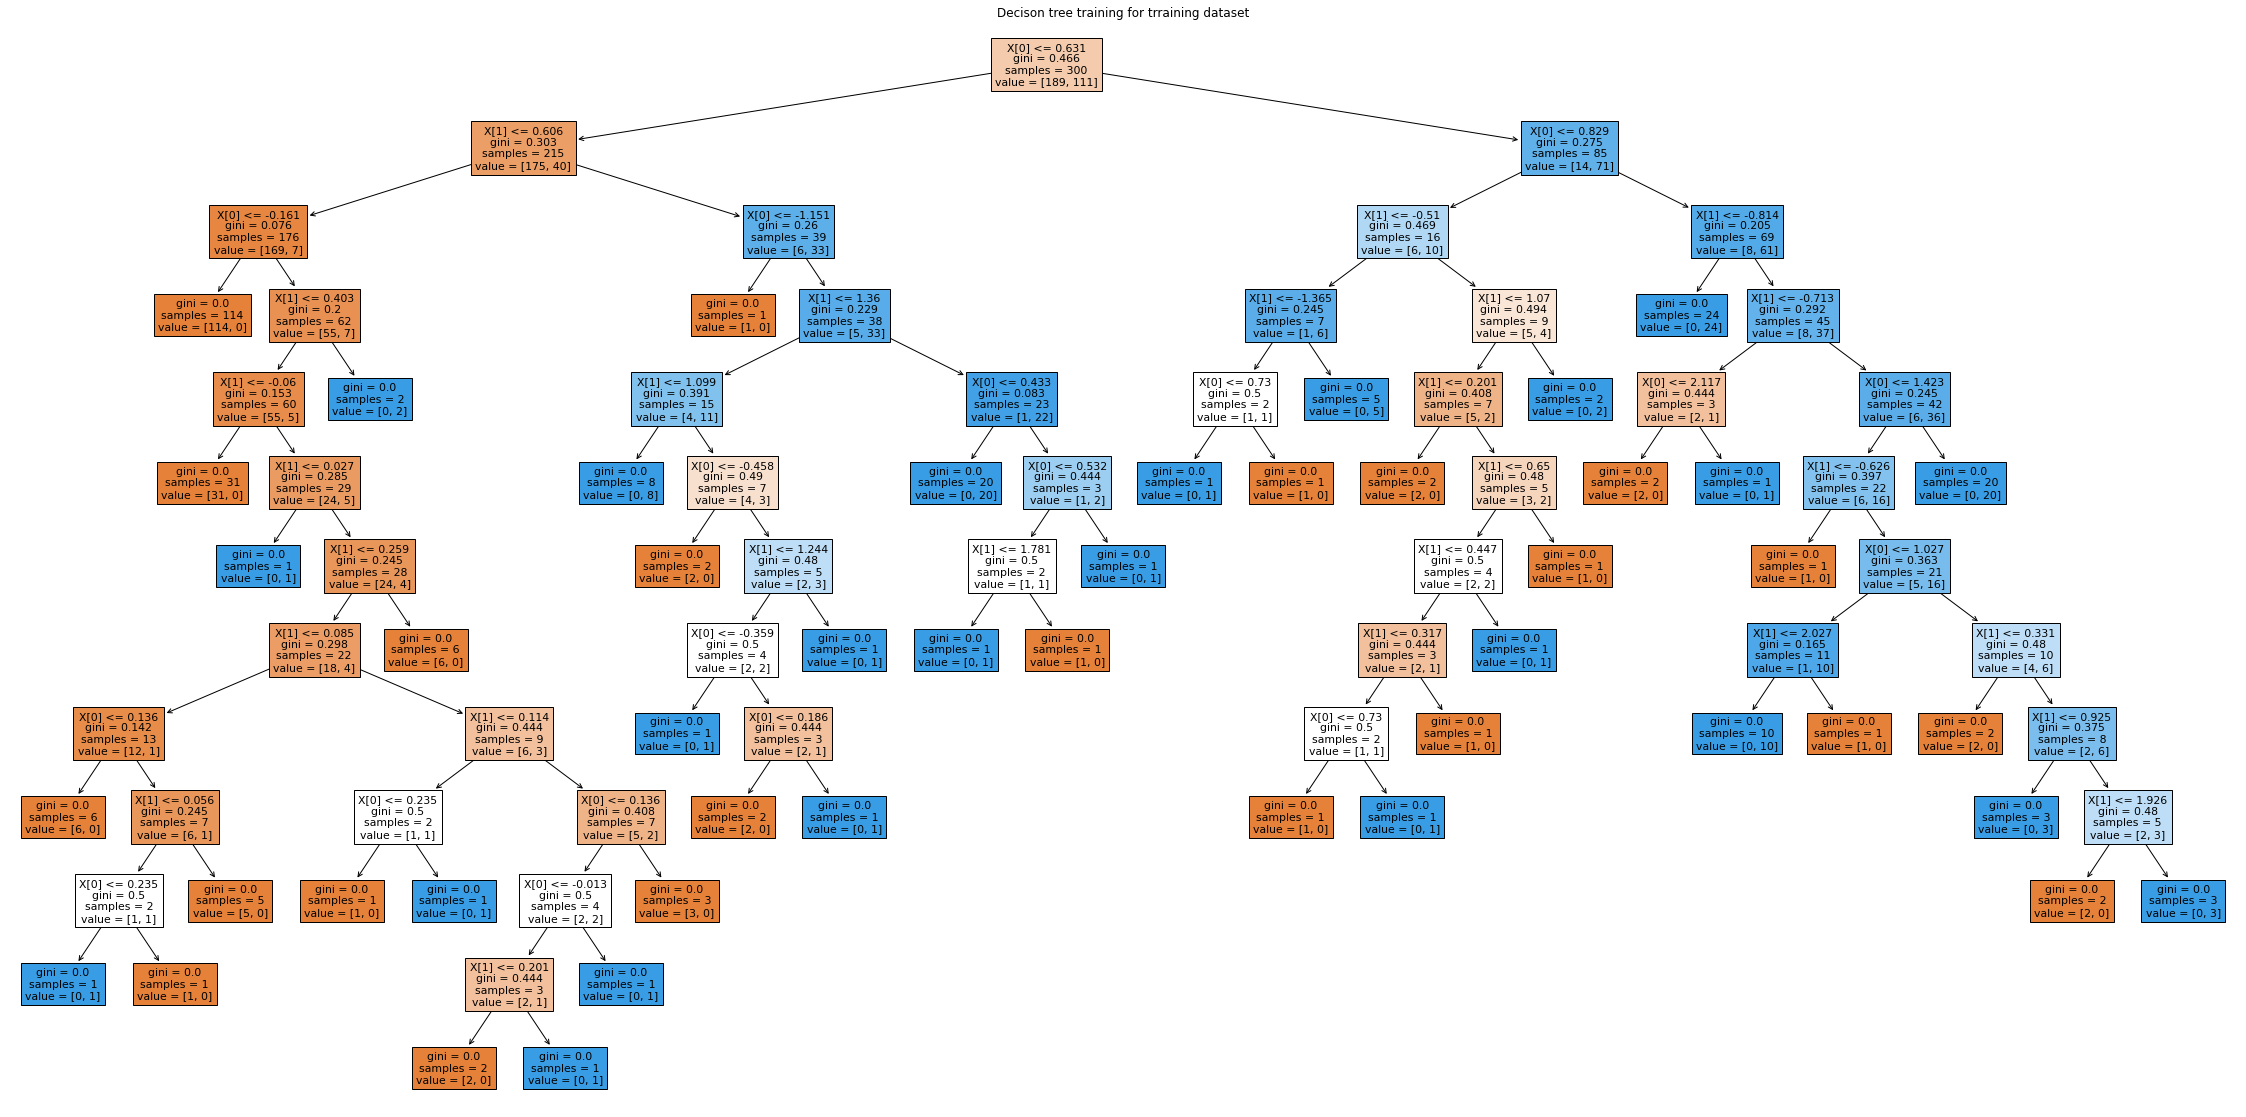

In [14]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

clf= DecisionTreeClassifier()

plt.figure(figsize=(40,20))

clf= clf.fit(X_train,y_train)
plot_tree(clf,filled=True)

plt.title("Decison tree training for trraining dataset")

plt.show()


In [15]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

clf= DecisionTreeClassifier()

plt.figure(figsize=(40,20))

clf= clf.fit(X_test,y_test)

plot_tree(clf,filled=True)

plt.title("Decison tree training for testing dataset")

plt.show()


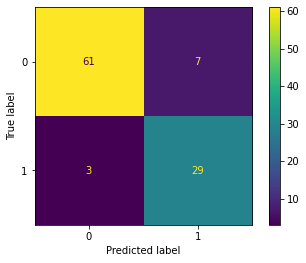

In [17]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred,labels= classifer.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)

disp.plot()

plt.show()

In [28]:
from sklearn.metrics import confusion_matrix

def confusion_matrix(y_actual,y_pred):

    TP=0
    FP=0
    TN=0
    FN=0

    for i in range(len(y_pred)):
        if y_actual[i]==y_pred[i]==1:
            TP += 1
        elif y_actual[i]==1 and y_pred[i]==0:
            FP += 1
        elif y_actual[i]==y_pred[i]==0:
            TN += 1
        else:
            FN += 1


    print("True positive",TP)
    print("False positive",FP)
    print("True negative",TN)
    print("False negative",FN)




# Assuming y_test are your true labels and y_pred are your predicted labels
confusion_matrix(y_test, y_pred)
print(cm)

True positive 29
False positive 3
True negative 61
False negative 7
[[61  7]
 [ 3 29]]
